In [125]:
!pip install seaborn

## State of the art (ROAD, sort base ranking and linear noisy imputation notrain method)

In [1]:
noretrain_linear = "/workspaces/outputs/road/sota/results/noretrain.json"
noretrain_fixed = "/workspaces/outputs/road/sort_fixed/results/noretrain.json"
noretrain_telea = "/workspaces/outputs/road/sort_telea/results/noretrain.json"
noretrain_ns = "/workspaces/outputs/road/sort_ns/results/noretrain.json"

notretrain_threshold_linear = "/workspaces/outputs/road/threshold_linear/results/noretrain.json"

notretrain_threshold_fixed = "/workspaces/outputs/road/threshold_fixd/results/noretrain.json"

notretrain_threshold_telea = "/workspaces/outputs/road/threshold_telea/results/noretrain.json"
notretrain_threshold_ns = "/workspaces/outputs/road/threshold_ns/results/noretrain.json"


In [2]:
import json
import pandas as pd
import numpy as np

In [3]:
with open(noretrain_linear) as json_file:
    noretrain_linear = json.load(json_file)


In [4]:
with open(noretrain_fixed) as json_file:
    noretrain_fixed = json.load(json_file)

In [5]:
with open(noretrain_telea) as json_file:
    noretrain_telea = json.load(json_file)



In [6]:
with open(notretrain_threshold_linear) as json_file:
    notretrain_threshold_linear = json.load(json_file)

In [7]:
with open(noretrain_ns) as json_file:
    noretrain_ns = json.load(json_file)

In [8]:
with open(notretrain_threshold_fixed) as json_file:
    notretrain_threshold_fixed = json.load(json_file)


In [9]:
with open(notretrain_threshold_telea) as json_file:
    notretrain_threshold_telea = json.load(json_file)

In [10]:
with open(notretrain_threshold_ns) as json_file:
    notretrain_threshold_ns = json.load(json_file)

In [11]:
def averaging_accuracy(dict_result):
    import copy
    
    dictionary = copy.deepcopy(dict_result)
    for method in dictionary['imputations']:
        for key_m, value_m in dictionary[method].items():
            for key_sb, value_ac in value_m.items():
                for key_f, value_f in  value_ac.items():                  
                    for key_p, value_ar in value_f.items():
                        value_f[key_p] = sum(value_ar)/len(value_ar)
    return dictionary

In [12]:
def plot_consistancy( data_dict, appraoch="linear", morf=True, path=None):
    import seaborn as sns
    import copy
    if morf:
        method = 'MoRF'
    else:
        method ='LeRF'
    printable_data_dict = copy.deepcopy(data_dict)
    new_dict = {}
    new_dict['x_axis'] = printable_data_dict["percentages"]
    for key_m,  val_m in printable_data_dict[appraoch].items():
        for key_var, val_var in val_m.items():
            if not morf:
                accs = val_var['lerf']
                l = list(accs.values())
                l.reverse()
                new_dict[f"{key_m}-{key_var}"] = l
            else:
                accs = val_var['morf']
                new_dict[f"{key_m}-{key_var}"] = list(accs.values())
                 

    import seaborn as sns
    sns.set_theme(style="whitegrid")

    data = pd.DataFrame.from_dict(new_dict)
    data = data.set_index('x_axis')

    ax = sns.lineplot(data=data, palette="tab10", linewidth=2.5)
    ax.set(ylim=(0.1, 1))
    ax.set(xlim=(0.1, 1))
    ax.set(xlabel=f'% romoved {method}', ylabel='Accuracy')
    ax.figure.savefig(f'{path}/{appraoch}-{method}.png')
    ax.figure.clf()
   

from scipy.stats import spearmanr
def calculate_sperman_rank(accuracy_result, method = "telea", morf=True):
    ranking = {}
    for key_m,  val_m in accuracy_result[method].items():
        for key_var, val_var in val_m.items():
            if morf:
                res = np.array(list(val_var["morf"].values()))
                per = list(val_var["morf"].keys())
                per = 1 - np.array([float(x) for x in per])
            else:
                res =  list(val_var["lerf"].values())
                #res.reverse()
                res = 1 - np.array(res)
                per = list(val_var["lerf"].keys())
                
                per = [float(x) for x in per]
                
            score = spearmanr(per, res).correlation
            ranking[f"{key_m}-{key_var}"] = score
    ranking = {k: v for k, v in sorted(ranking.items(),  key=lambda item: item[1])}
    
    return ranking



In [13]:
def calculate_spearman_morf_lerf(accuracy_result, method = "telea"):
    scores =[]
    for key_m,  val_m in accuracy_result[method].items():
        for key_var, val_var in val_m.items():
                morf = list(val_var["morf"].values())
                lerf =  list(val_var["lerf"].values())
                lerf.reverse()
                score = spearmanr(morf, lerf).correlation
                scores.append(score)
    return scores


In [14]:
def calculate_correlation(accuracy_result, method= "telea"):
    scores = {}
    from scipy.stats.stats import pearsonr   
    for key_m,  val_m in accuracy_result[method].items():
        for key_var, val_var in val_m.items():
                morf = list(val_var["morf"].values())
                lerf =  list(val_var["lerf"].values())
                lerf.reverse()
                #lerf = 1 - np.array(lerf)
                scores[key_var] = pearsonr(morf,lerf)

    return scores

In [15]:
def show_images(path):
    from PIL import Image
    import glob
    images = glob.glob(f'{path}/*.png')
    for im in images:
        im = Image.open(im)
        display(im)



In [16]:
averaged_accuarcy_linear = averaging_accuracy(noretrain_linear)
averaged_accuarcy_fixed = averaging_accuracy(noretrain_fixed)
averaged_accuarcy_telea = averaging_accuracy(noretrain_telea)
averaged_accuracy_ns =  averaging_accuracy(noretrain_ns)

averaged_accuracy_threshold_linear = averaging_accuracy(notretrain_threshold_linear)
averaged_accuracy_threshold_fixed = averaging_accuracy(notretrain_threshold_fixed)
averaged_accuracy_threshold_telea = averaging_accuracy(notretrain_threshold_telea)
averaged_accuracy_threshold_ns = averaging_accuracy(notretrain_threshold_ns)

## Liner fixed

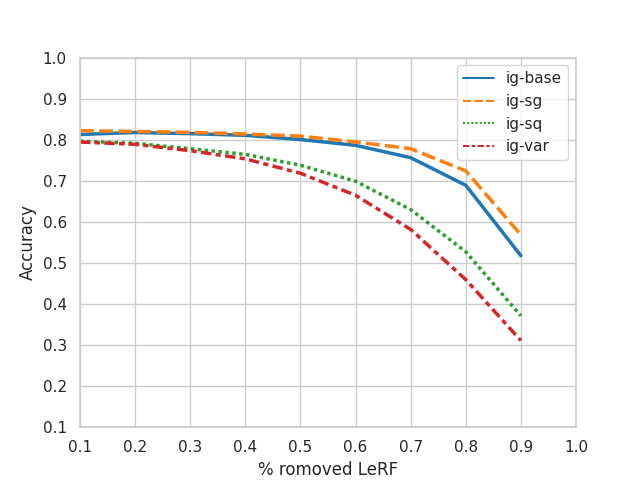

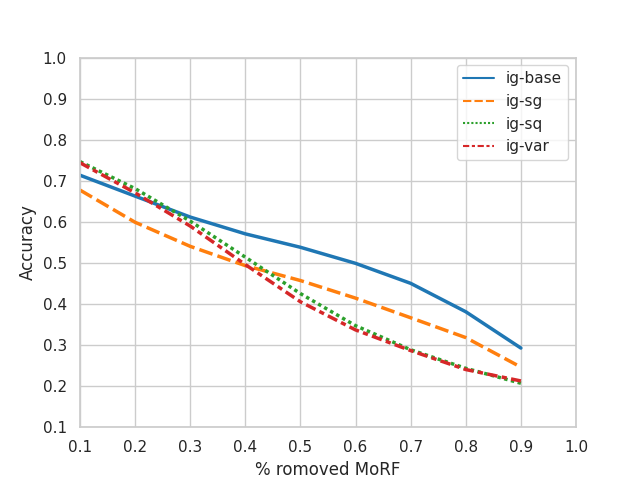

<Figure size 640x480 with 0 Axes>

In [142]:
plot_consistancy(averaged_accuarcy_fixed, morf=True, appraoch="fixed", path=f'/workspaces/outputs/road/sort_fixed/plots')
plot_consistancy(averaged_accuarcy_fixed, morf=False, appraoch="fixed", path=f'/workspaces/outputs/road/sort_fixed/plots')
show_images("/workspaces/outputs/road/sota/plots")

In [17]:
ranking = calculate_sperman_rank(averaged_accuarcy_fixed, method='fixed', morf=False)
print(ranking)
ranking = calculate_sperman_rank(averaged_accuarcy_fixed, method='fixed', morf=True)
print(ranking)

{'ig-base': -1.0, 'ig-sg': -1.0, 'ig-sq': -1.0, 'ig-var': -1.0}
{'ig-sg': 0.9833333333333333, 'ig-base': 1.0, 'ig-sq': 1.0, 'ig-var': 1.0}


In [26]:
scores = calculate_spearman_morf_lerf(averaged_accuarcy_telea, method='ns')
scores

NameError: name 'averaged_accuarcy_ns' is not defined

## SOTA (Sorted linear)

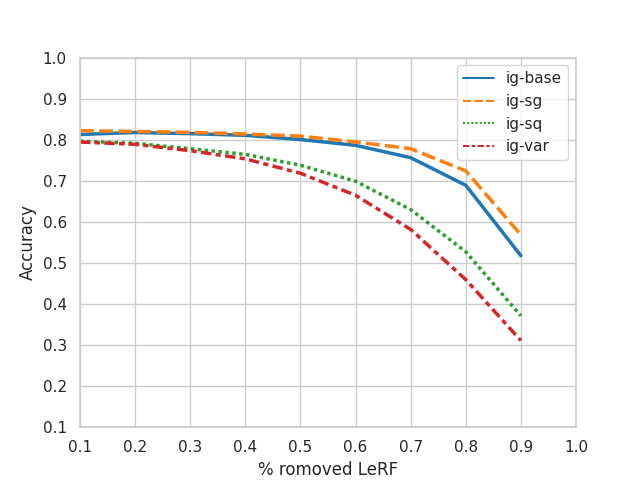

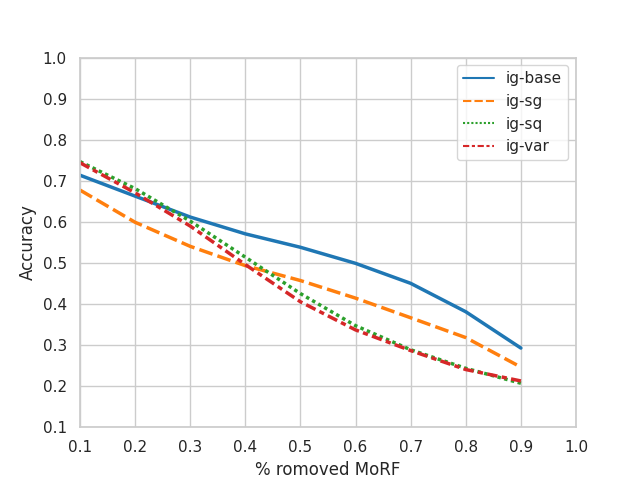

<Figure size 640x480 with 0 Axes>

In [145]:
plot_consistancy(averaged_accuarcy_linear, morf=True, appraoch="linear", path=f'/workspaces/outputs/road/sota/plots')
plot_consistancy(averaged_accuarcy_linear, morf=False, appraoch="linear", path=f'/workspaces/outputs/road/sota/plots')
show_images("/workspaces/outputs/road/sota/plots")

In [146]:
ranking = calculate_sperman_rank(averaged_accuarcy_linear, method='linear', morf=False)
print(ranking)
ranking = calculate_sperman_rank(averaged_accuarcy_linear, method='linear', morf=True)
print(ranking)

{'ig-sg': -1.0, 'ig-sq': -1.0, 'ig-var': -1.0, 'ig-base': -0.9500000000000001}
{'ig-base': 1.0, 'ig-sg': 1.0, 'ig-sq': 1.0, 'ig-var': 1.0}


In [147]:
scores = calculate_spearman_morf_lerf(averaged_accuarcy_linear, method='linear')
scores

[0.9500000000000001, 1.0, 1.0, 1.0]

## Sort telea


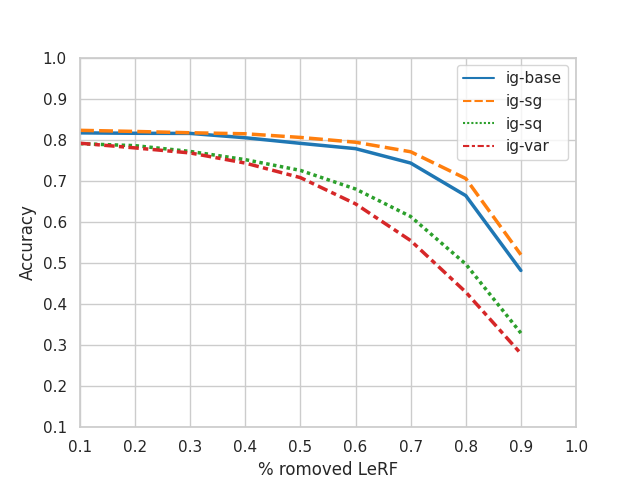

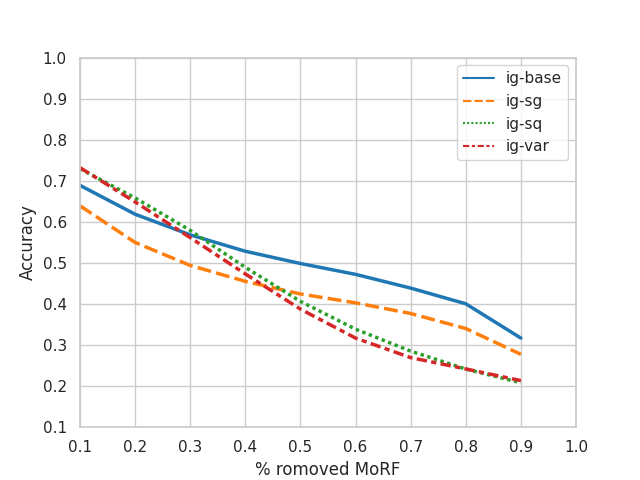

<Figure size 640x480 with 0 Axes>

In [148]:
plot_consistancy(averaged_accuarcy_telea, appraoch='telea', morf=False, path=f'/workspaces/outputs/road/sort_telea/plots')

plot_consistancy(averaged_accuarcy_telea, appraoch='telea', morf=True, path=f'/workspaces/outputs/road/sort_telea/plots')

show_images('/workspaces/outputs/road/sort_telea/plots')

In [149]:
ranking = calculate_sperman_rank(averaged_accuarcy_telea, method='telea', morf=False)
print(ranking)
ranking = calculate_sperman_rank(averaged_accuarcy_telea, method='telea', morf=True)
print(ranking)

{'ig-base': -1.0, 'ig-sg': -1.0, 'ig-sq': -1.0, 'ig-var': -1.0}
{'ig-base': 1.0, 'ig-sg': 1.0, 'ig-sq': 1.0, 'ig-var': 1.0}


In [150]:
scores = calculate_spearman_morf_lerf(averaged_accuarcy_telea, method='telea')

print(scores)

[1.0, 1.0, 1.0, 1.0]


## Sort NS

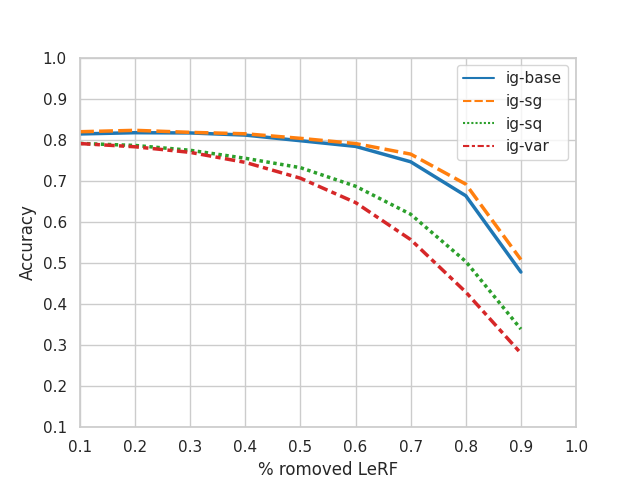

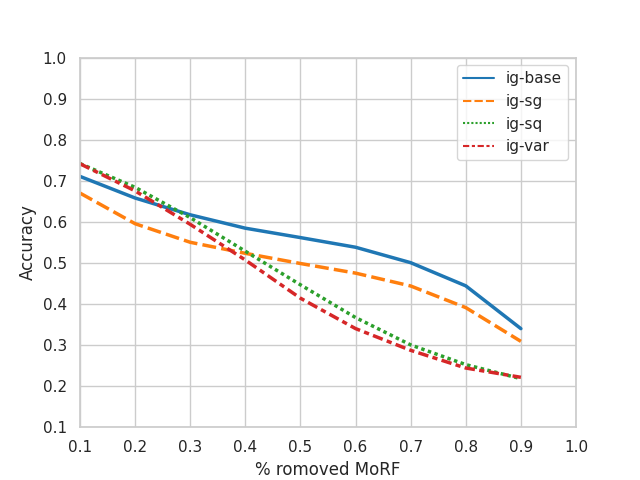

<Figure size 640x480 with 0 Axes>

In [151]:
plot_consistancy(averaged_accuracy_ns, morf=False, appraoch="ns", path=f'/workspaces/outputs/road/sort_ns/plots')
plot_consistancy(averaged_accuracy_ns, morf=True, appraoch="ns", path=f'/workspaces/outputs/road/sort_ns/plots')
show_images('/workspaces/outputs/road/sort_ns/plots')

## Threshold (Linear)

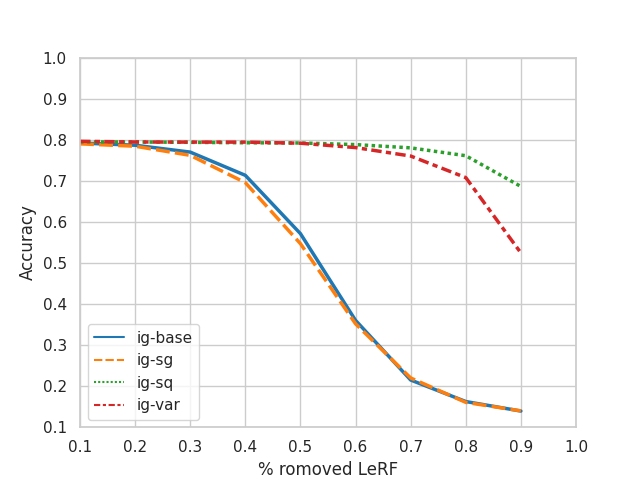

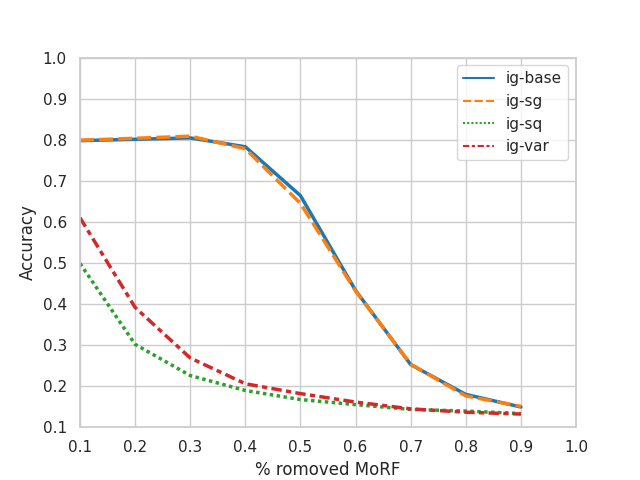

<Figure size 640x480 with 0 Axes>

In [152]:
plot_consistancy(averaged_accuracy_threshold_linear, morf=False, appraoch="linear", path=f'/workspaces/outputs/road/threshold_linear/plots')
plot_consistancy(averaged_accuracy_threshold_linear, morf=True, appraoch="linear", path=f'/workspaces/outputs/road/threshold_linear/plots')
show_images(f'/workspaces/outputs/road/threshold_linear/plots')

In [153]:
ranking = calculate_sperman_rank(averaged_accuracy_threshold_linear, method='linear', morf=False)
print(ranking)
ranking = calculate_sperman_rank(averaged_accuracy_threshold_linear, method='linear', morf=True)
print(ranking)

{'ig-base': -1.0, 'ig-sg': -1.0, 'ig-sq': -1.0, 'ig-var': -0.9958246164193105}
{'ig-base': 0.9333333333333332, 'ig-sg': 0.9333333333333332, 'ig-sq': 1.0, 'ig-var': 1.0}


In [154]:
scores =  calculate_spearman_morf_lerf(averaged_accuracy_threshold_linear, method='linear')
print(scores)


[0.9333333333333332, 0.9333333333333332, 1.0, 0.9958246164193105]


## Threshold (fixed)

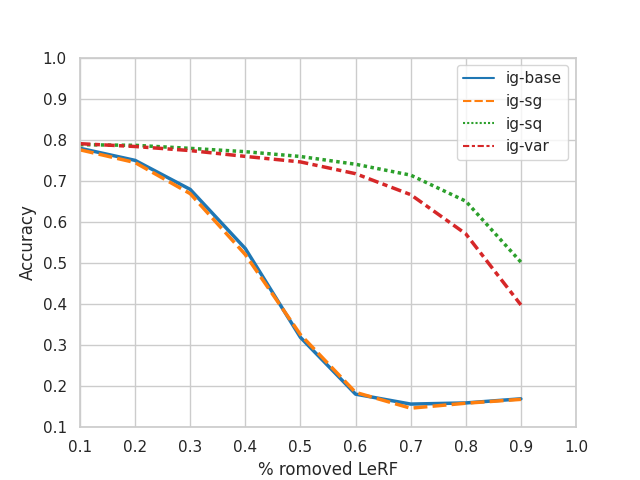

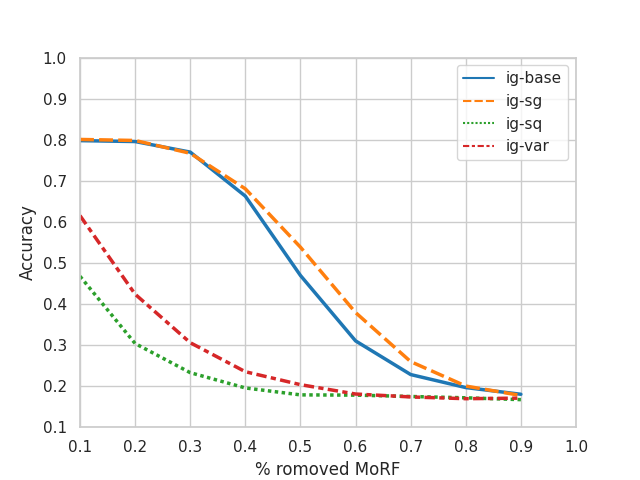

<Figure size 640x480 with 0 Axes>

In [155]:
plot_consistancy(averaged_accuracy_threshold_fixed, morf=False, appraoch="fixed", path=f'/workspaces/outputs/road/threshold_fixd/plots')
plot_consistancy(averaged_accuracy_threshold_fixed, morf=True, appraoch="fixed", path=f'/workspaces/outputs/road/threshold_fixd/plots')
show_images('/workspaces/outputs/road/threshold_fixd/plots')

## Threshold (telea)

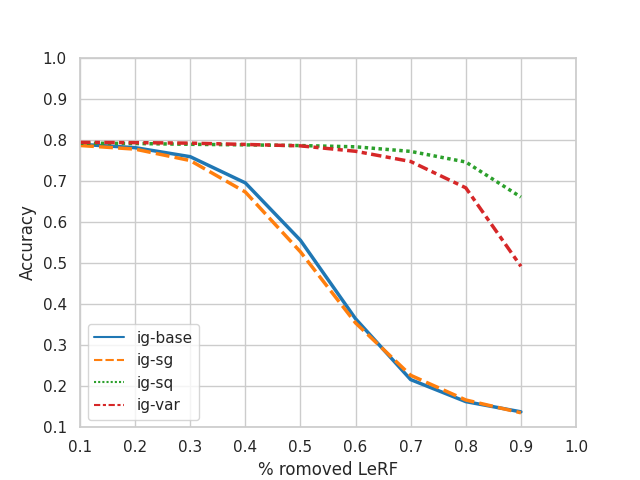

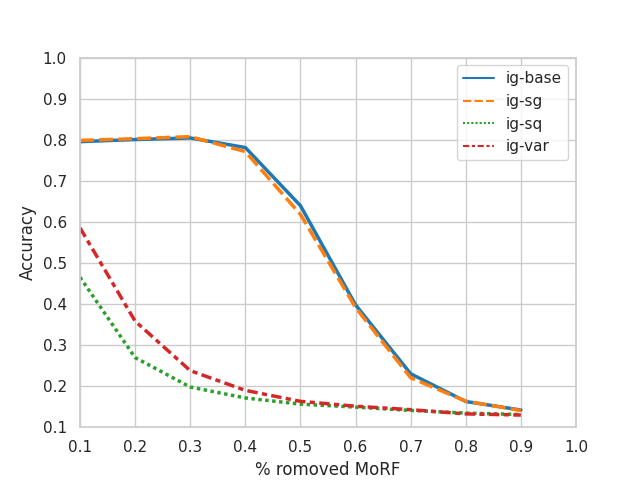

<Figure size 640x480 with 0 Axes>

In [156]:
plot_consistancy(averaged_accuracy_threshold_telea, morf=False, appraoch="telea", path=f'/workspaces/outputs/road/threshold_telea/plots')
plot_consistancy(averaged_accuracy_threshold_telea, morf=True, appraoch="telea", path=f'/workspaces/outputs/road/threshold_telea/plots')
show_images('/workspaces/outputs/road/threshold_telea/plots')

In [157]:
ranking = calculate_sperman_rank(averaged_accuracy_threshold_telea, method='telea', morf=False)
print(ranking)
ranking = calculate_sperman_rank(averaged_accuracy_threshold_telea, method='telea', morf=True)
print(ranking)


{'ig-base': -1.0, 'ig-sg': -1.0, 'ig-sq': -1.0, 'ig-var': -1.0}
{'ig-base': 0.9333333333333332, 'ig-sg': 0.9333333333333332, 'ig-sq': 1.0, 'ig-var': 1.0}


In [158]:

scores =  calculate_spearman_morf_lerf(averaged_accuracy_threshold_telea, method='telea')
print("Spearman rank:", scores)

Spearman rank: [0.9333333333333332, 0.9333333333333332, 1.0, 1.0]


## Threshold (NS)

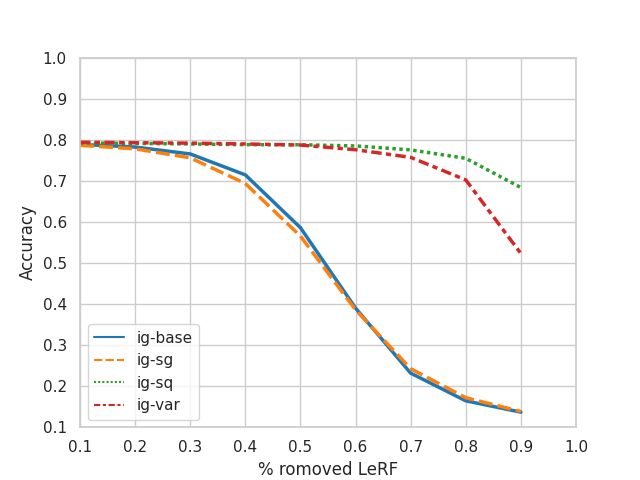

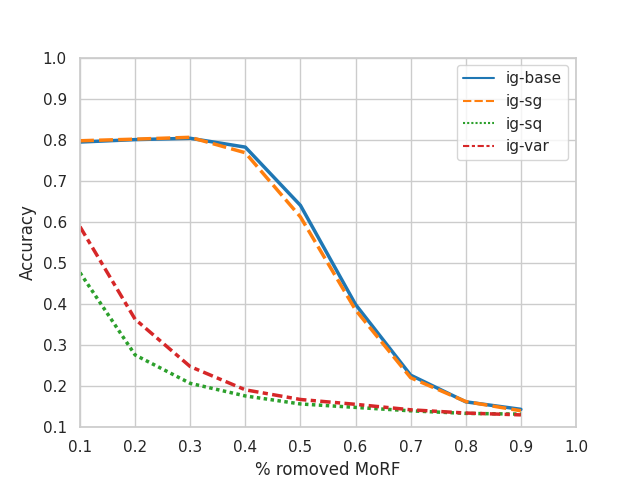

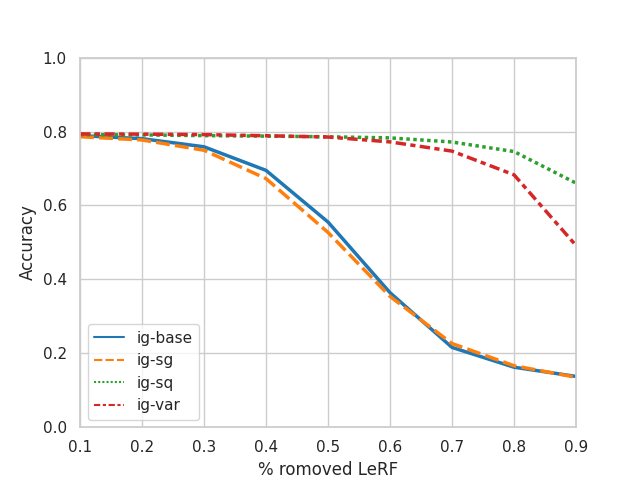

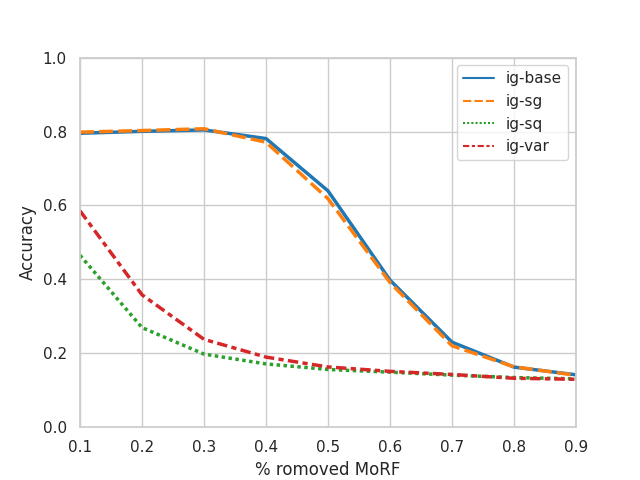

<Figure size 640x480 with 0 Axes>

In [159]:
plot_consistancy(averaged_accuracy_threshold_ns, morf=False, appraoch="ns", path=f'/workspaces/outputs/road/threshold_ns/plots')
plot_consistancy(averaged_accuracy_threshold_ns, morf=True, appraoch="ns", path=f'/workspaces/outputs/road/threshold_ns/plots')
show_images('/workspaces/outputs/road/threshold_ns/plots')

In [160]:
ranking = calculate_sperman_rank(averaged_accuracy_threshold_ns, method='ns', morf=False)
print(ranking)
ranking = calculate_sperman_rank(averaged_accuracy_threshold_ns, method='ns', morf=True)
print(ranking)


{'ig-base': -1.0, 'ig-sg': -1.0, 'ig-sq': -1.0, 'ig-var': -1.0}
{'ig-base': 0.9333333333333332, 'ig-sg': 0.9333333333333332, 'ig-sq': 1.0, 'ig-var': 1.0}


In [161]:

scores =  calculate_spearman_morf_lerf(averaged_accuracy_threshold_ns, method='ns')
print("Spearman rank:", scores)

Spearman rank: [0.9333333333333332, 0.9333333333333332, 1.0, 1.0]


## Sort(fixed)


## Coorelation of morf and lerf

## Sorted (fixed)

In [162]:
calculate_correlation(averaged_accuarcy_fixed, method="fixed")

/tmp/ipykernel_47997/166481380.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


{'base': PearsonRResult(statistic=0.9619571875298945, pvalue=3.4065745472296116e-05),
 'sg': PearsonRResult(statistic=0.9385961680743795, pvalue=0.0001778301463839407),
 'sq': PearsonRResult(statistic=0.817359709211331, pvalue=0.0071347867341469634),
 'var': PearsonRResult(statistic=0.8248294511260214, pvalue=0.006212626507806716)}

In [163]:
calculate_correlation(averaged_accuarcy_linear, method="linear")

/tmp/ipykernel_47997/166481380.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


{'base': PearsonRResult(statistic=0.862233643358002, pvalue=0.0027854062948356583),
 'sg': PearsonRResult(statistic=0.7874201402747916, pvalue=0.0117631342439761),
 'sq': PearsonRResult(statistic=0.8455144909488415, pvalue=0.004088342203487747),
 'var': PearsonRResult(statistic=0.8535310442178314, pvalue=0.0034207894593252792)}

In [164]:
calculate_correlation(averaged_accuracy_threshold_linear, method="linear")

/tmp/ipykernel_47997/166481380.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


{'base': PearsonRResult(statistic=0.9939121349832553, pvalue=5.7622394784262536e-08),
 'sg': PearsonRResult(statistic=0.9928644648303426, pvalue=1.0034905152420147e-07),
 'sq': PearsonRResult(statistic=0.3987520388427955, pvalue=0.2877516477831875),
 'var': PearsonRResult(statistic=0.41067203024689947, pvalue=0.27222471336254345)}

In [165]:
calculate_correlation(averaged_accuracy_threshold_ns, method="ns")

/tmp/ipykernel_47997/166481380.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


{'base': PearsonRResult(statistic=0.9974074726216473, pvalue=2.9138931485331324e-09),
 'sg': PearsonRResult(statistic=0.9969775900352107, pvalue=4.983070174652476e-09),
 'sq': PearsonRResult(statistic=0.3915073380324733, pvalue=0.29740637873539094),
 'var': PearsonRResult(statistic=0.40210328520830374, pvalue=0.28334110934148105)}